In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df = pd.read_csv('car_data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

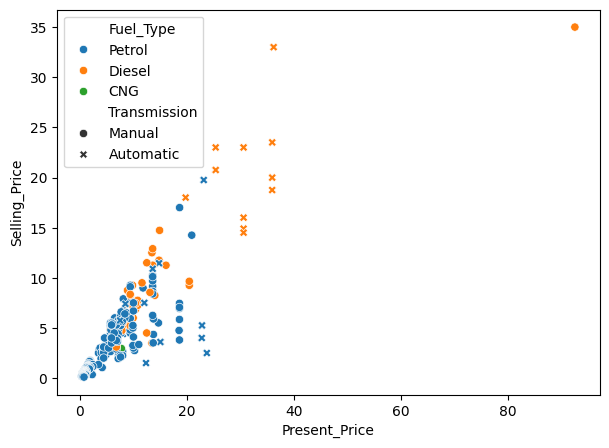

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(data= df, y = 'Selling_Price', x = 'Present_Price', hue= 'Fuel_Type', style = 'Transmission')
plt.show()

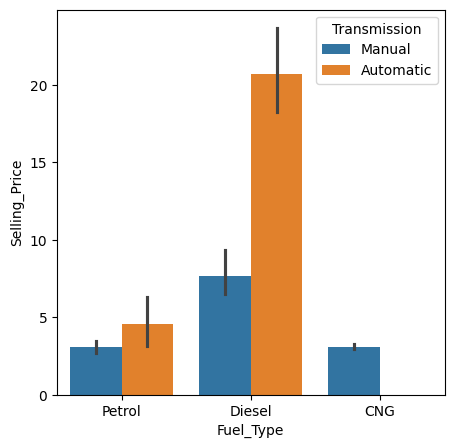

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(data= df, y = 'Selling_Price', x = 'Fuel_Type', hue = 'Transmission')
plt.show()

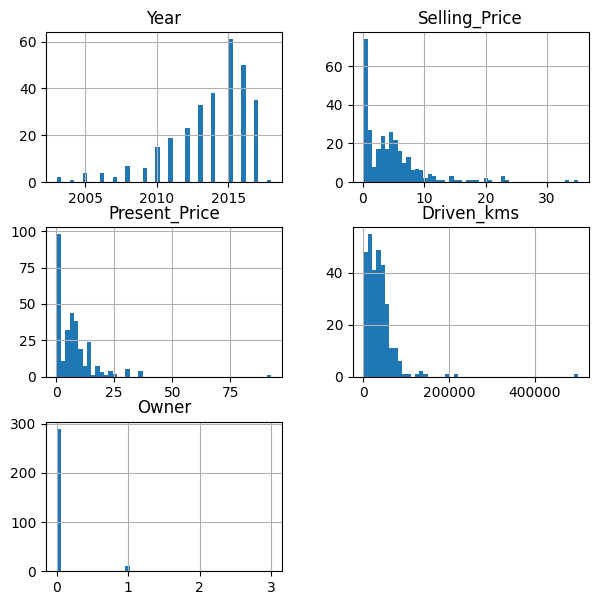

In [29]:
df.hist(figsize=(7,7), bins=50)
plt.show()

<Figure size 1000x1500 with 0 Axes>

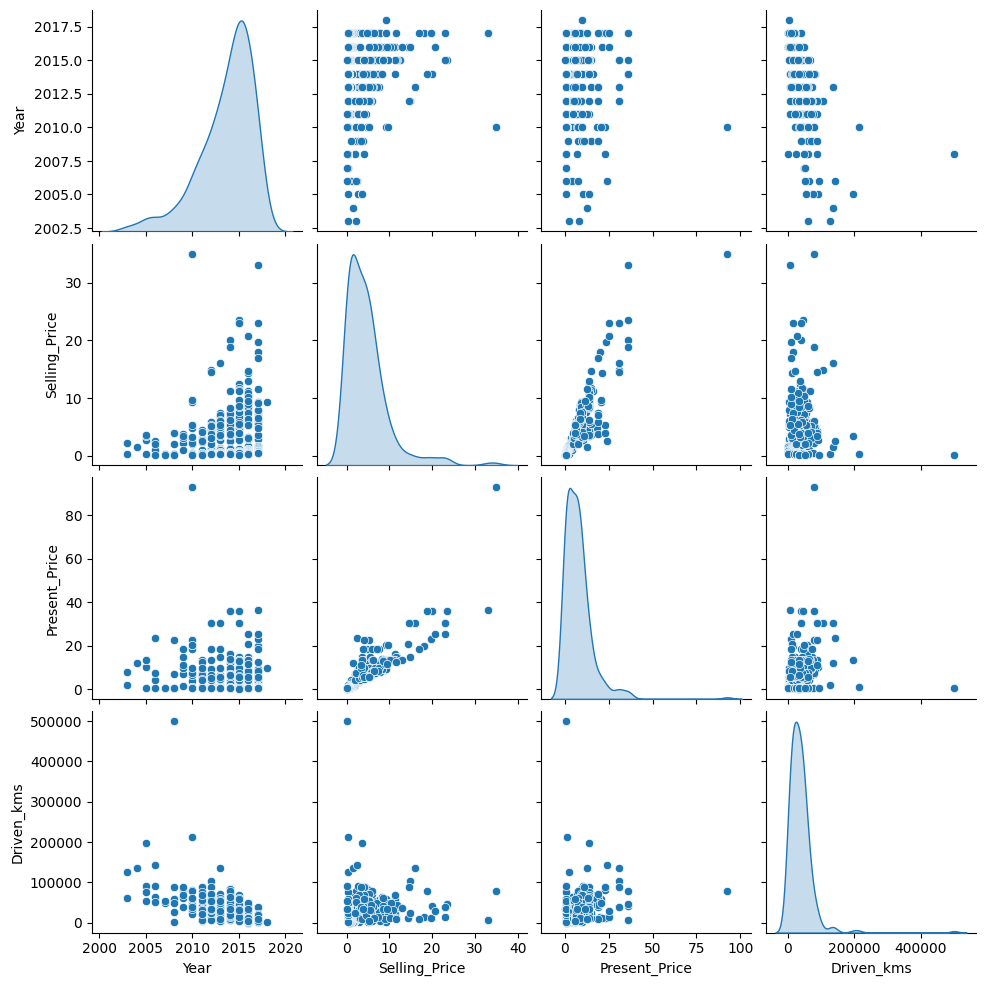

In [24]:
plt.figure(figsize=(10,15))
sns.pairplot(data= df[[ 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
                       'Fuel_Type', 'Selling_type', 'Transmission']], diag_kind='kde')
plt.show()

In [34]:
df.sample(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
162,Bajaj Pulsar NS 200,2012,0.45,0.99,14500,Petrol,Individual,Manual,0
216,eon,2016,2.90,4.43,12500,Petrol,Dealer,Manual,0


In [35]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [33]:
label = LabelEncoder()

In [36]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = label.fit_transform(df[col])

In [38]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
215,94,2012,4.50,9.40,36100,2,0,1,0
80,71,2016,14.73,14.89,23000,1,0,1,0
165,1,2016,0.45,0.54,500,2,1,0,0
262,64,2015,4.00,5.80,40023,2,0,1,0
274,66,2014,5.30,6.80,16500,2,0,1,0


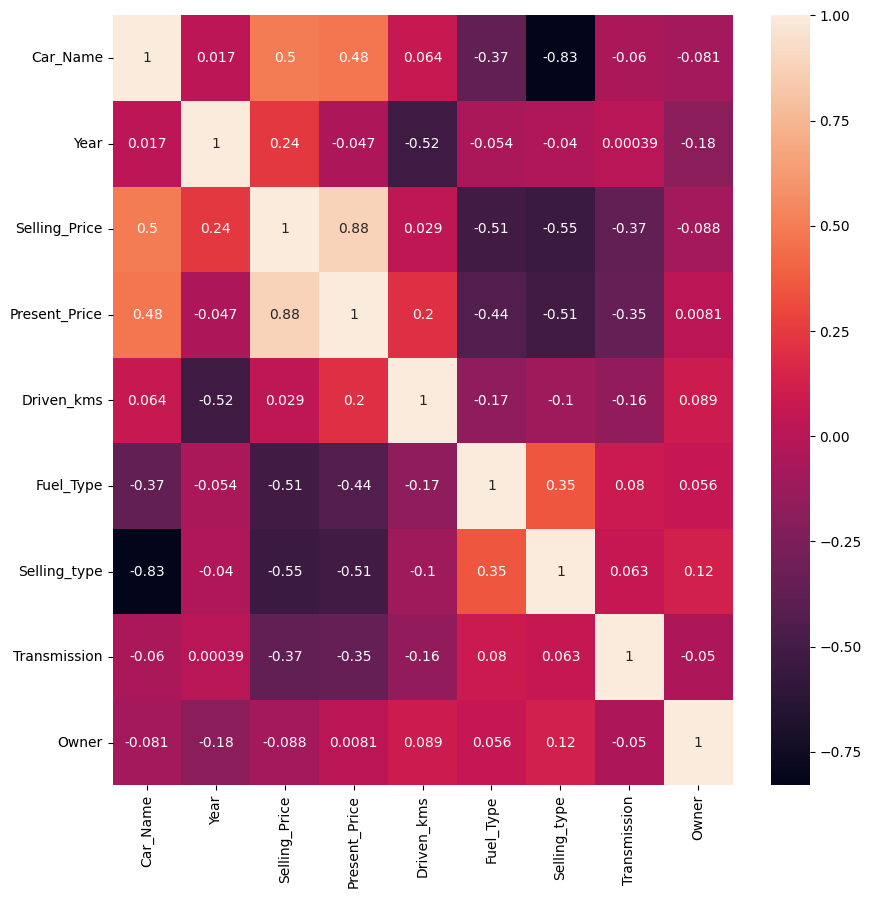

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [40]:
df.drop(columns=['Car_Name', 'Selling_type'], inplace=True)

In [41]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Transmission', 'Owner'],
      dtype='object')

In [60]:
X = df.drop(columns=['Selling_Price', 'Owner', 'Transmission'])
y = df['Selling_Price']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.2)

In [62]:
model_1 = LinearRegression()
model_2 = RandomForestRegressor()

In [63]:
model_1.fit(X_train, y_train)

LinearRegression()

In [64]:
model_2.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
linear = model_1.predict(X_test)
randomforest = model_2.predict(X_test)

In [68]:
print('Linear Regression')
print(mean_squared_error(y_test, linear))
print(r2_score(y_test, linear))

Linear Regression
2.7826995291406664
0.8717306082386953


In [69]:
print('Random Forest regressor')
print(mean_squared_error(y_test, randomforest))
print(r2_score(y_test, randomforest))

Random Forest regressor
1.8061289585245903
0.9167459294378179
